In [1]:
import torch
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import os
from torcheval.metrics import FrechetInceptionDistance

In [2]:
filelist=os.listdir('../../data/Paris-satellite/Paris')
for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
    if not(fichier.endswith(".png")):
        filelist.remove(fichier)
print(filelist)

['007379_Paris_48.86013_2.23208.png', '010545_Paris_48.83893_2.32660.png', '003691_Paris_48.93698_2.32544.png', '021496_Paris_48.81216_2.38839.png', '012582_Paris_48.81200_2.35129.png', '009258_Paris_48.78642_2.22161.png', '016062_Paris_49.02131_2.28491.png', '005907_Paris_48.97982_2.29354.png', '019615_Paris_49.00550_2.24930.png', '019431_Paris_48.92973_2.40340.png', '010878_Paris_49.01036_2.35299.png', '020126_Paris_48.82146_2.40677.png', '017039_Paris_48.91791_2.17227.png', '017622_Paris_48.95108_2.24379.png', '017718_Paris_48.83850_2.37223.png', '014594_Paris_48.73370_2.40623.png', '002042_Paris_48.82104_2.30853.png', '000060_Paris_48.94739_2.42785.png', '002069_Paris_48.93880_2.38790.png', '004363_Paris_48.88712_2.23697.png', '013350_Paris_48.80544_2.42220.png', '016266_Paris_48.75569_2.42237.png', '014504_Paris_48.96104_2.17107.png', '007705_Paris_48.92709_2.32783.png', '020876_Paris_48.74621_2.22274.png', '005276_Paris_48.79761_2.25028.png', '012518_Paris_48.78637_2.38372.png', 

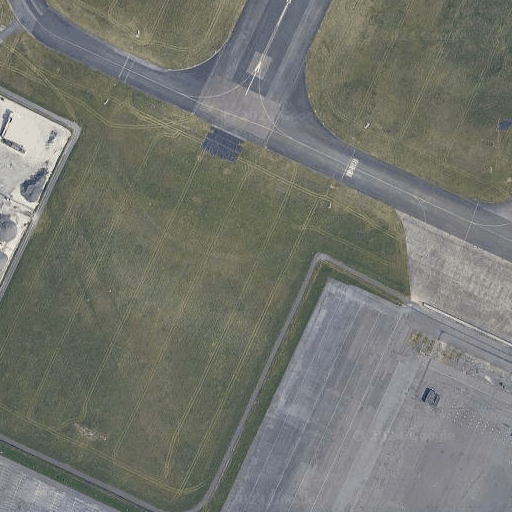

In [3]:
jpgfile = Image.open("../../data/Paris-satellite/Paris/000060_Paris_48.94739_2.42785.png", )
jpgfile

In [4]:
# C'est déjà normalisé, pour retrouver la valeur RGB, il faut multiplier par 255
tensor_transform = transforms.ToTensor()
tensort_test = tensor_transform(jpgfile)
tensort_test[:, 0, 0]

tensor([0.4706, 0.4549, 0.3843])

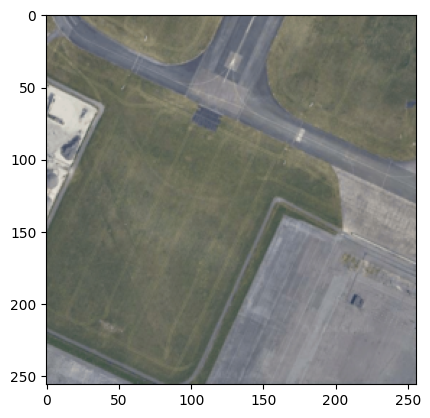

In [5]:
compressed_tensor = transforms.functional.resize(tensort_test, (256, 256))
plt.imshow(compressed_tensor.permute(1, 2, 0));

In [6]:
"""
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data",
                        train = True,
                        download = True,
                        transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
                                    batch_size = 32,
                                    shuffle = True)

 """

'\n# Transforms images to a PyTorch Tensor\ntensor_transform = transforms.ToTensor()\n\n# Download the MNIST Dataset\ndataset = datasets.MNIST(root = "./data",\n                        train = True,\n                        download = True,\n                        transform = tensor_transform)\n\n# DataLoader is used to load the dataset\n# for training\nloader = torch.utils.data.DataLoader(dataset = dataset,\n                                    batch_size = 32,\n                                    shuffle = True)\n\n '

In [14]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self, res = 256):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(res*res, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(16, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, res*res),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Début de l'epoch : 1


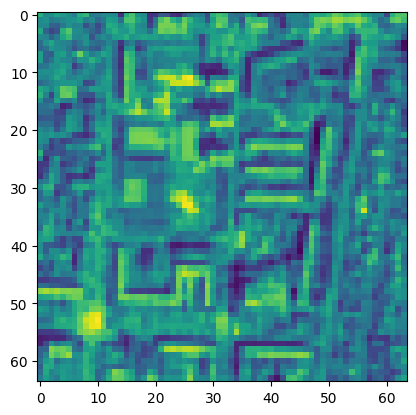

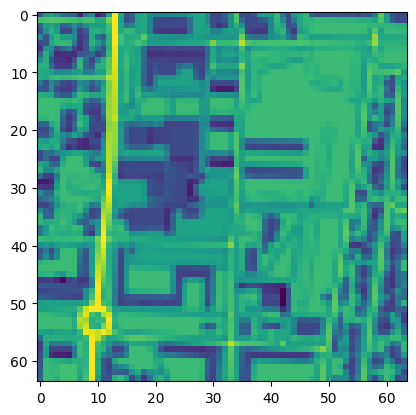

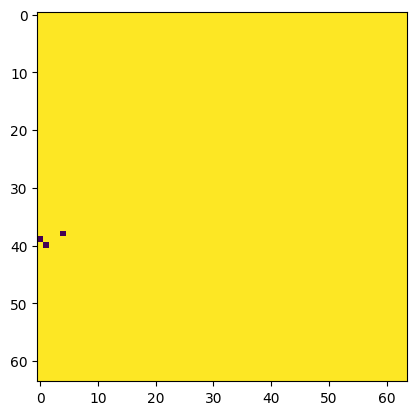

Début de l'epoch : 2


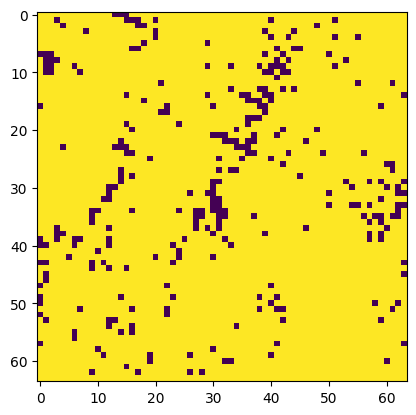

Début de l'epoch : 3


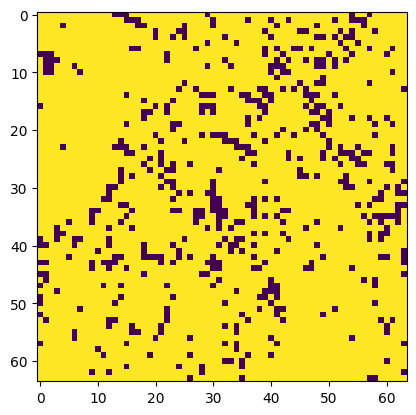

Début de l'epoch : 4


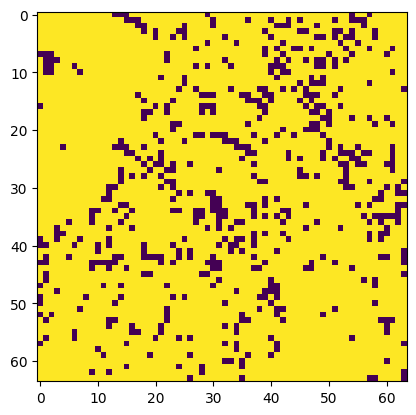

Début de l'epoch : 5


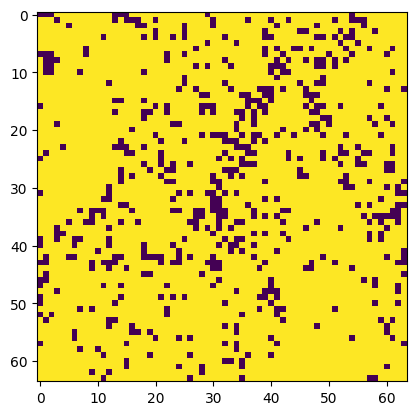

Début de l'epoch : 6


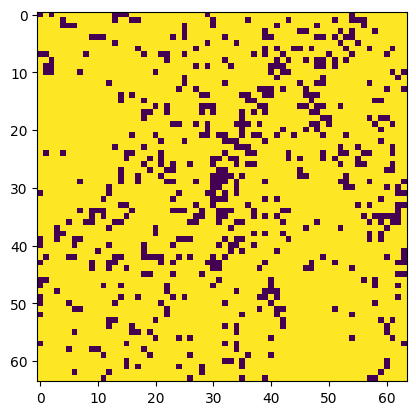

Début de l'epoch : 7


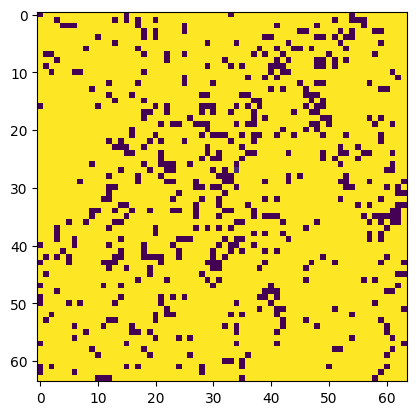

Début de l'epoch : 8


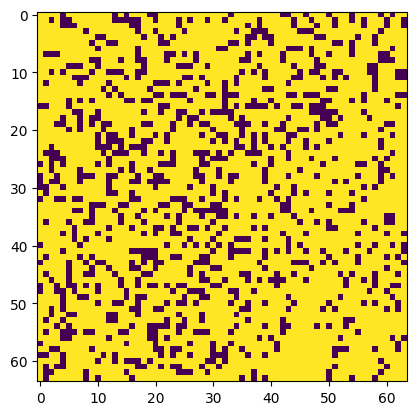

Début de l'epoch : 9


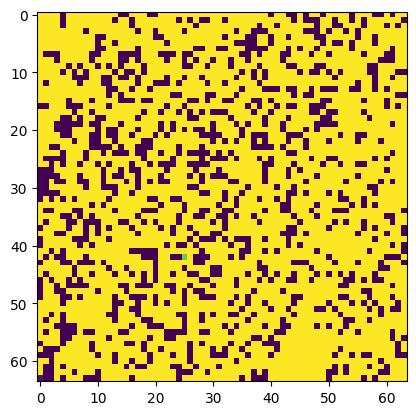

Début de l'epoch : 10


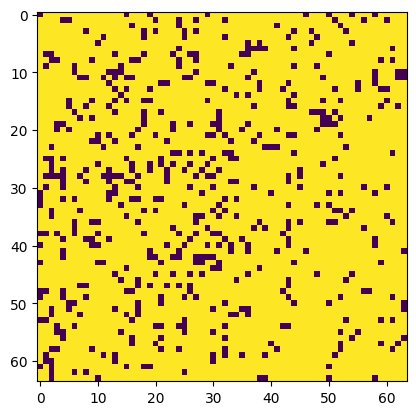

Début de l'epoch : 11


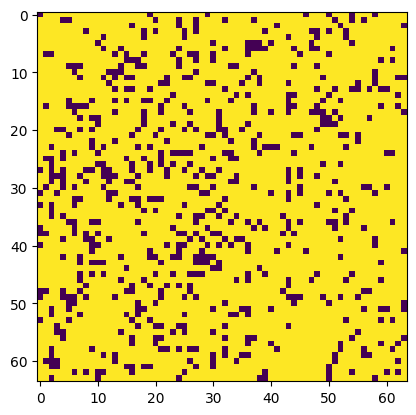

Début de l'epoch : 12


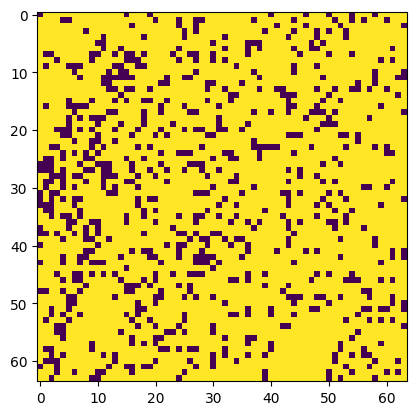

Début de l'epoch : 13


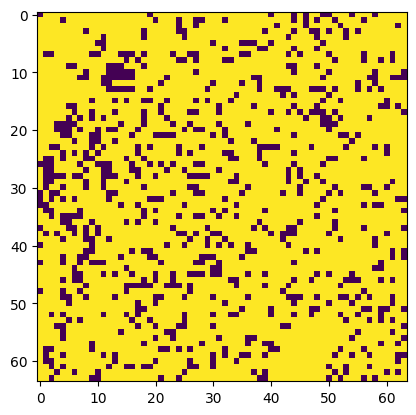

Début de l'epoch : 14


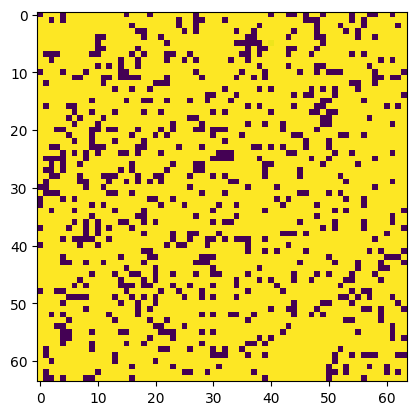

Début de l'epoch : 15


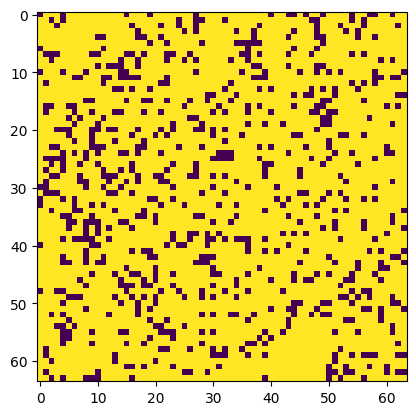

Début de l'epoch : 16


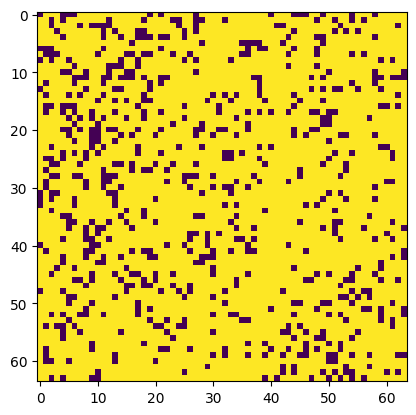

Début de l'epoch : 17


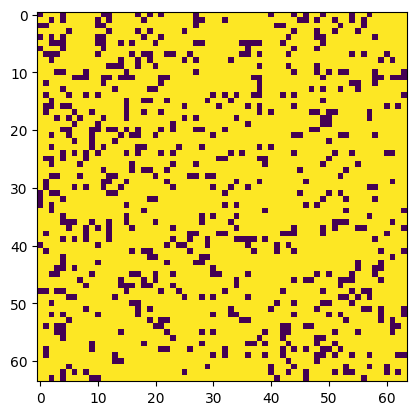

Début de l'epoch : 18


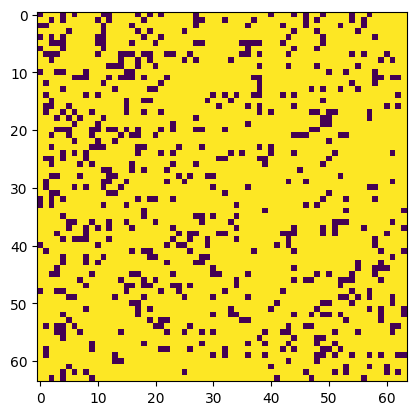

Début de l'epoch : 19


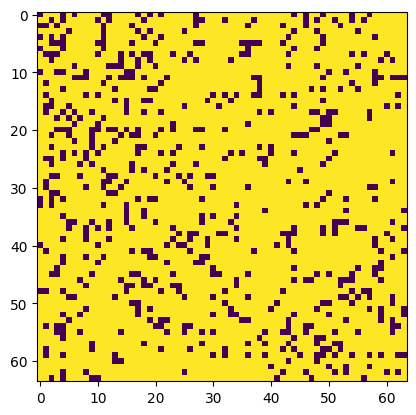

Début de l'epoch : 20


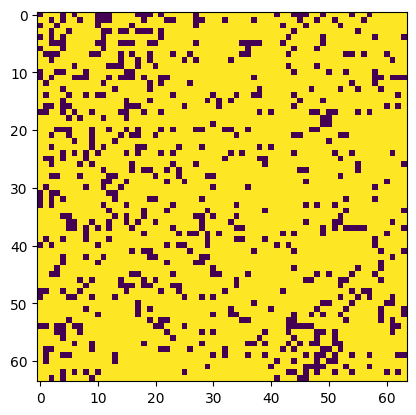

Début de l'epoch : 21


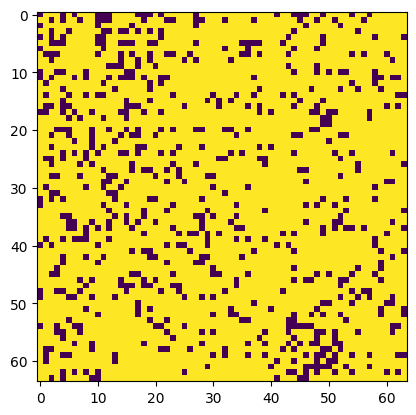

Début de l'epoch : 22


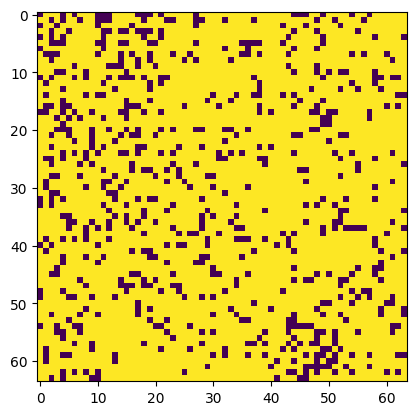

Début de l'epoch : 23


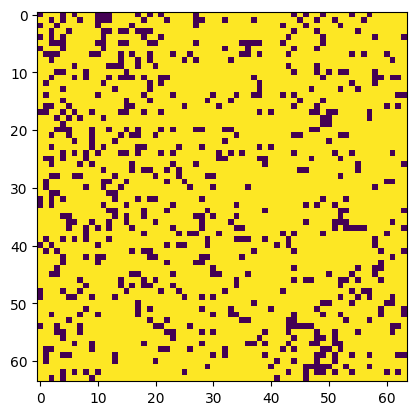

Début de l'epoch : 24


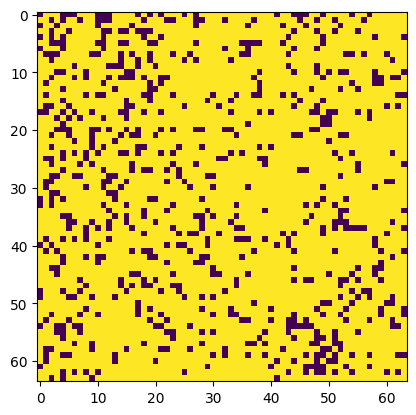

Début de l'epoch : 25


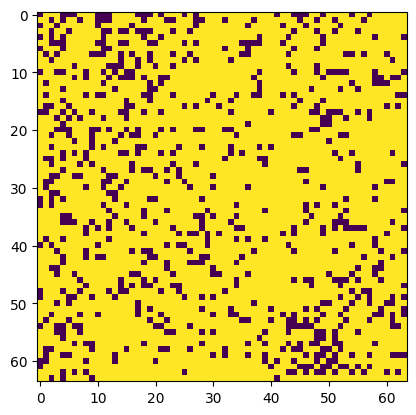

Début de l'epoch : 26


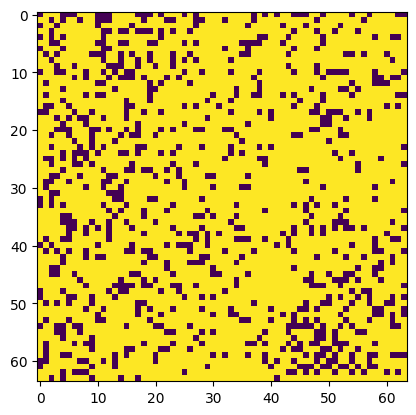

Début de l'epoch : 27


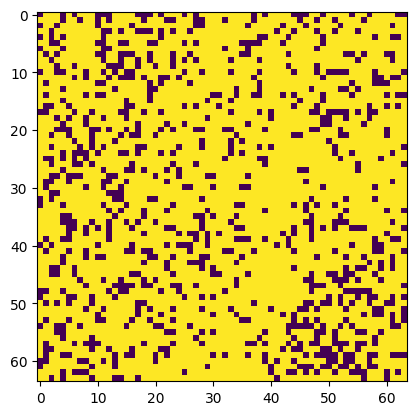

Début de l'epoch : 28


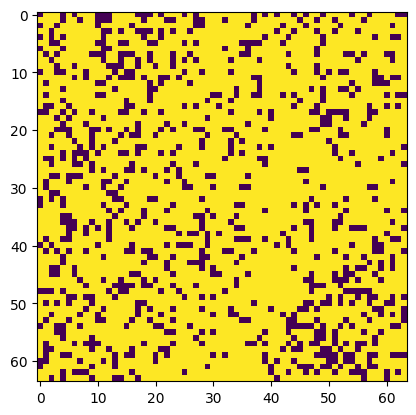

Début de l'epoch : 29


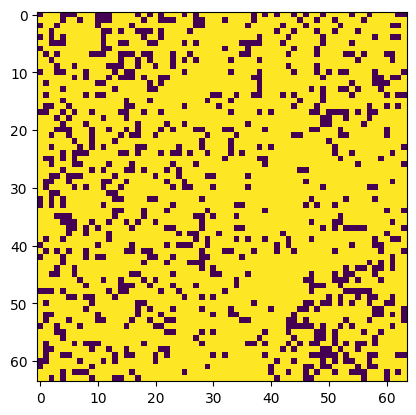

Début de l'epoch : 30


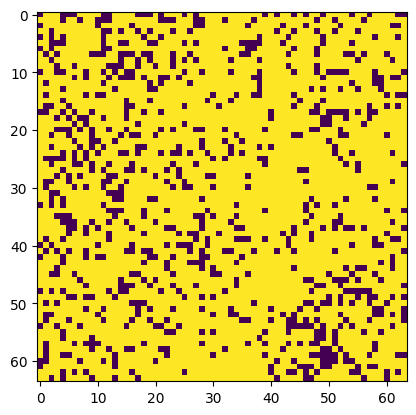

Début de l'epoch : 31


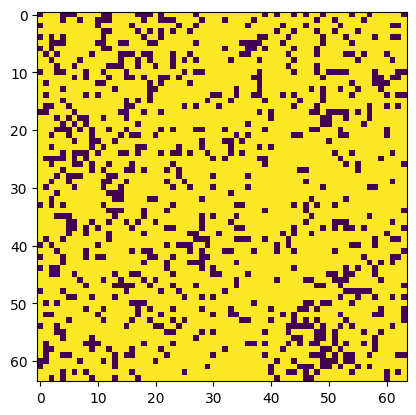

Début de l'epoch : 32


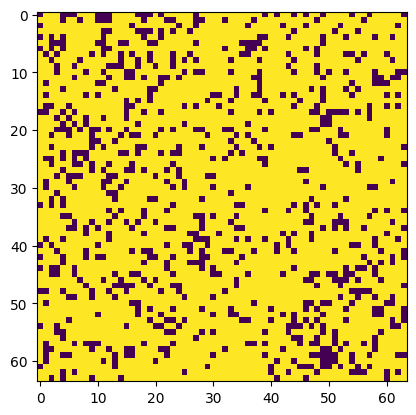

Début de l'epoch : 33


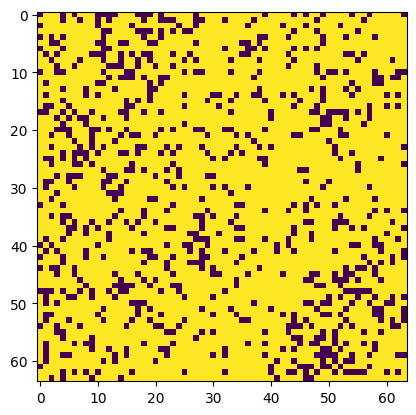

Début de l'epoch : 34


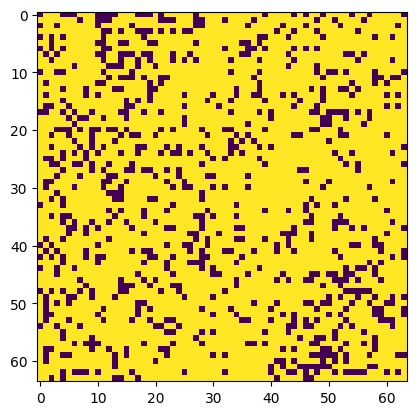

Début de l'epoch : 35


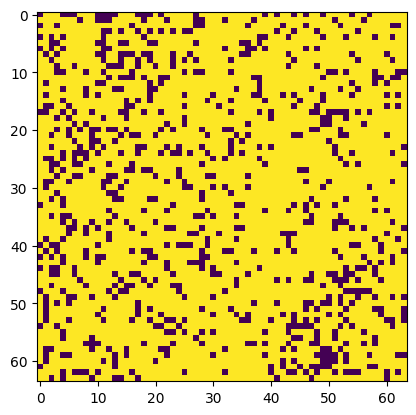

Début de l'epoch : 36


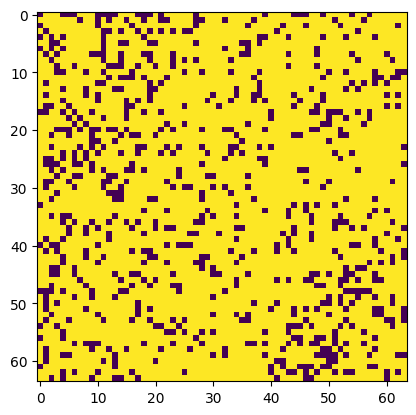

Début de l'epoch : 37


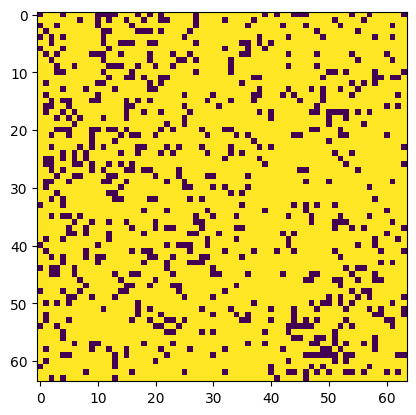

Début de l'epoch : 38


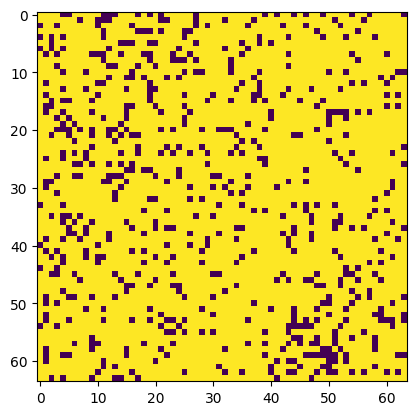

Début de l'epoch : 39


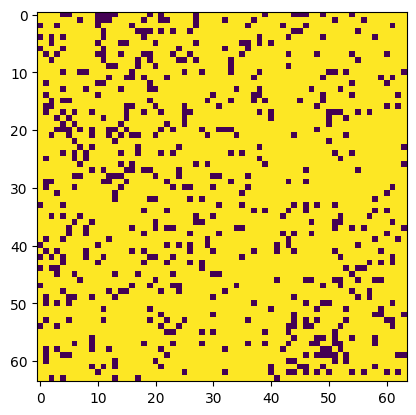

Début de l'epoch : 40


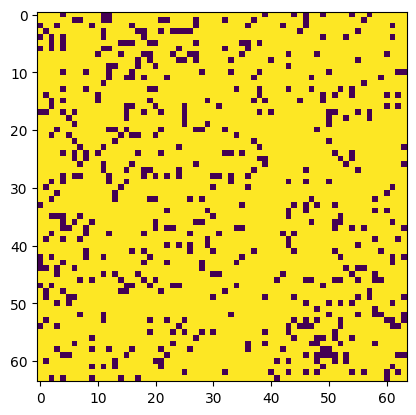

Début de l'epoch : 41


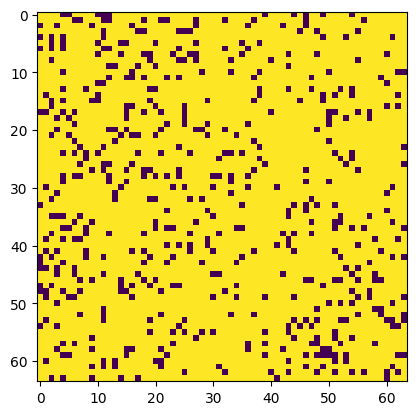

Début de l'epoch : 42


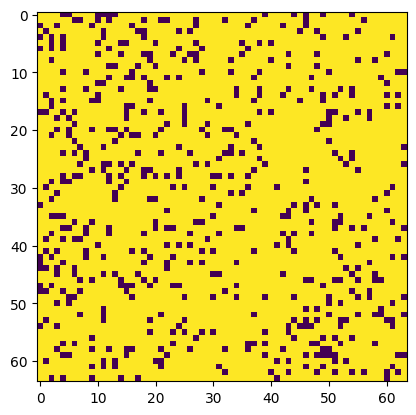

Début de l'epoch : 43


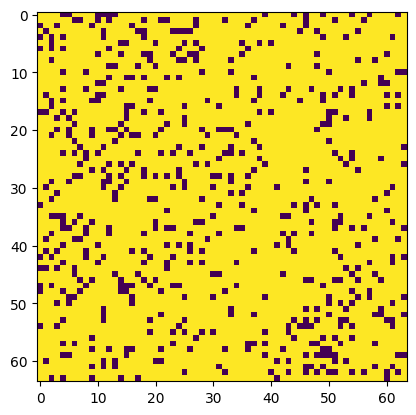

Début de l'epoch : 44


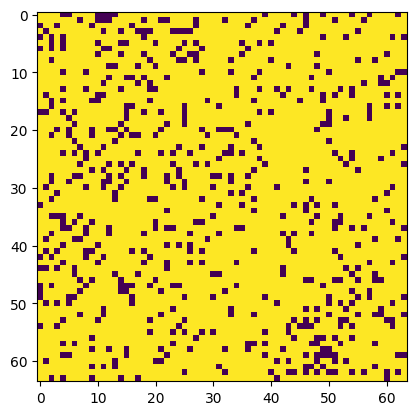

Début de l'epoch : 45


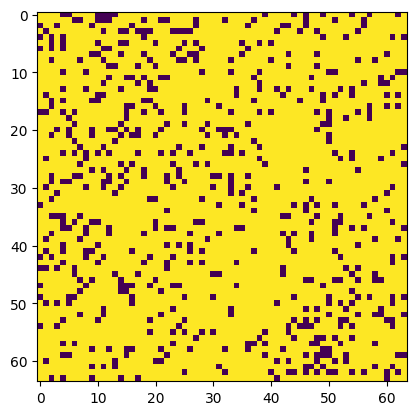

Début de l'epoch : 46


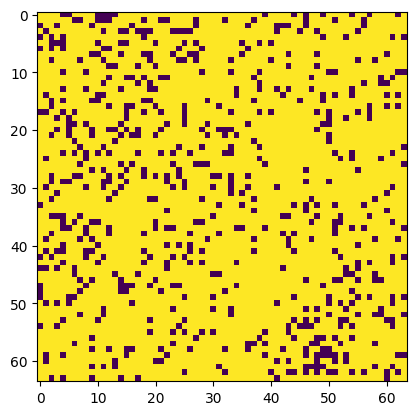

Début de l'epoch : 47


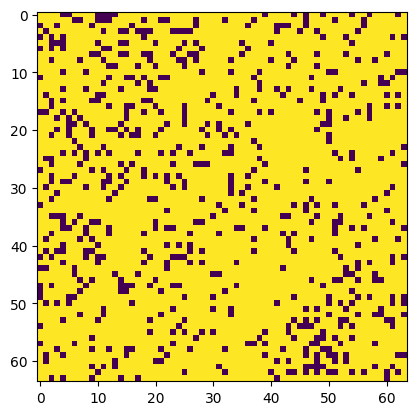

Début de l'epoch : 48


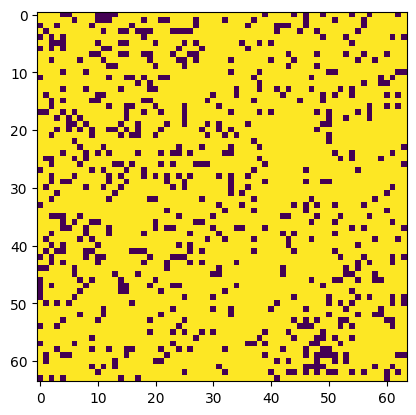

Début de l'epoch : 49


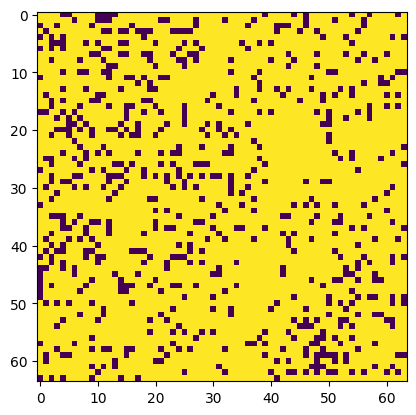

Début de l'epoch : 50


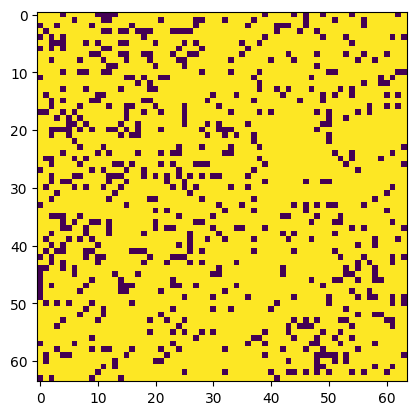

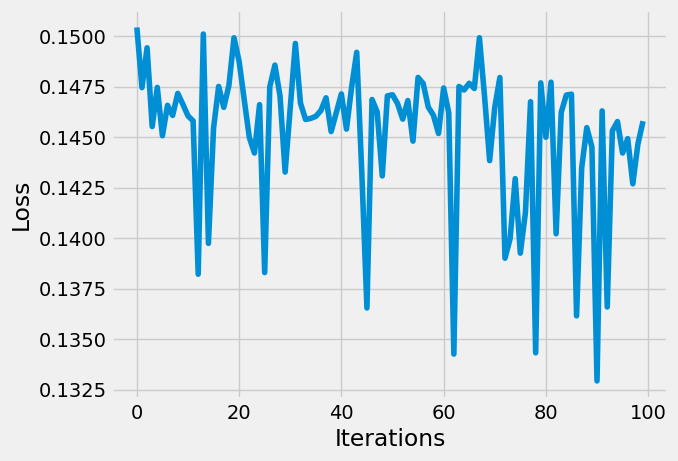

In [15]:
dim = 64
epochs = 50
batch_size = 16
outputs = []
losses = []
metrics = []

url_sat = "../../data/Paris-satellite/Paris/"
url_plan = "../../data/Paris-plans/Paris/"

tensor_transform = transforms.ToTensor()
grayscale = transforms.Grayscale()
tensort_test = tensor_transform(jpgfile)
# fid = FrechetInceptionDistance(model=model, feature_dim=64)

# Model Initialization
model = AE(dim)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                            lr = 1e-1,
                            weight_decay = 1e-8)


for epoch in range(epochs):

    print(f"Début de l'epoch : {epoch + 1}")

    outputs = []

    for index_batch in range(0, len(filelist), batch_size):

        batch = filelist[index_batch:index_batch+batch_size]

        compressed_tensors = [transforms.functional.resize(tensor_transform(Image.open(url_sat+img)), (dim, dim)) for img in batch]
        plans = [transforms.functional.resize(tensor_transform(Image.open(url_plan+img)), (dim, dim)) for img in batch]

        for i, image in enumerate(compressed_tensors):

            image = grayscale(image).reshape(-1, dim*dim)
            reconstructed = model(image)
            plan = grayscale(plans[i]).reshape(-1, dim*dim)
            loss = loss_function(reconstructed, plan)

            """
            pred = reconstructed.expand(1, 3, 64, 64)
            print(pred.shape)
            real = grayscale(plans[-1]).expand(1, 3, 64, 64)
            print(real.shape)

            fid.update(pred, is_real=False)
            fid.update(real, is_real=True)
            fid.compute()
            """

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses.append(loss.item())
            outputs.append((epochs, image, plan, reconstructed))

        """fid.reset()"""

        #print(f"Batch {int(index_batch/batch_size +1)}/{int((len(filelist))/batch_size)+1} de l'epoch {epoch + 1} terminé")

    if epoch == 0:
        plt.imshow(outputs[-1][1].reshape(dim, dim))
        plt.show()
        plt.imshow(outputs[-1][2].reshape(dim, dim))
        plt.show()
    plt.imshow(torch.reshape(outputs[-1][3], (dim, dim)).detach().numpy())
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

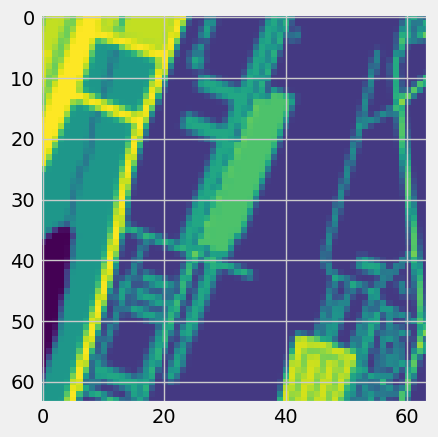

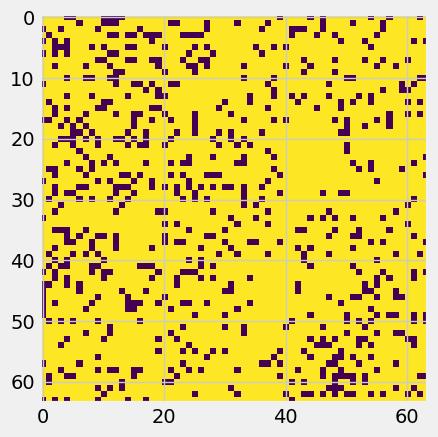

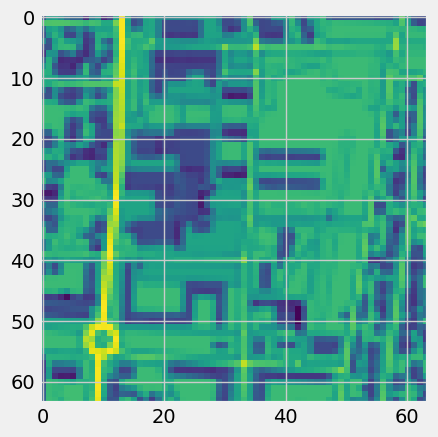

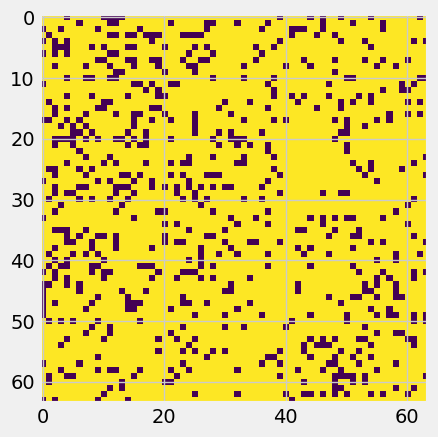

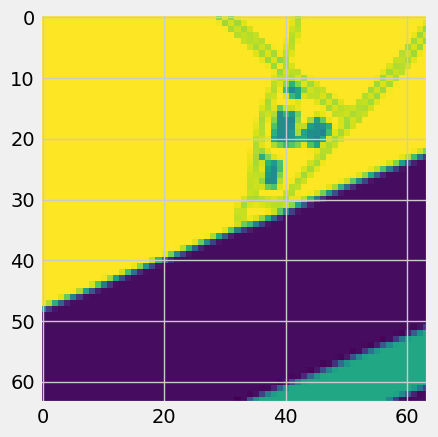

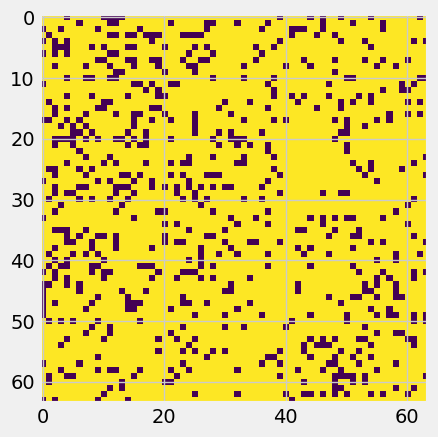

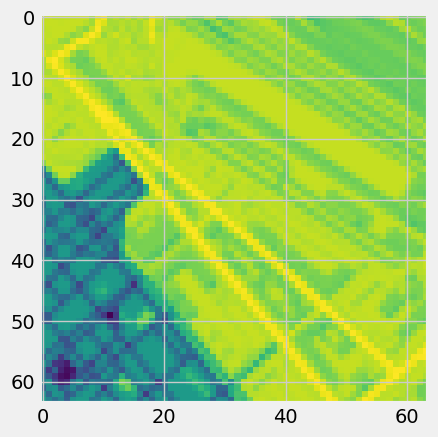

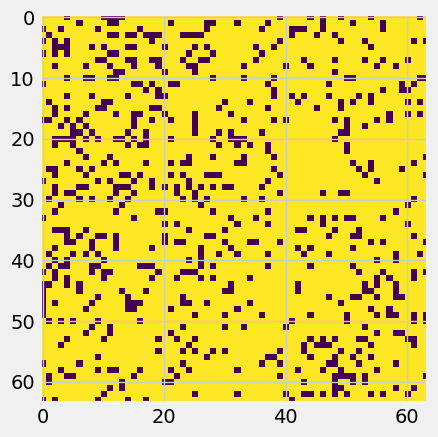

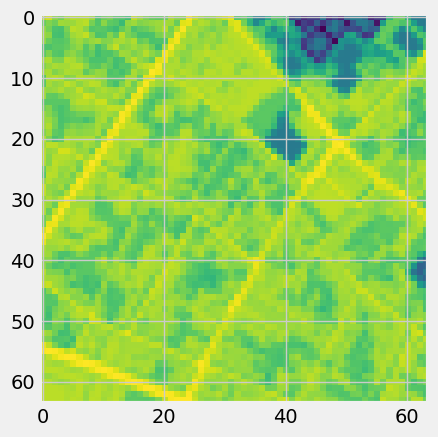

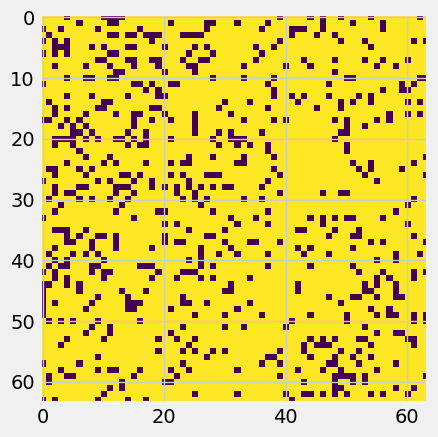

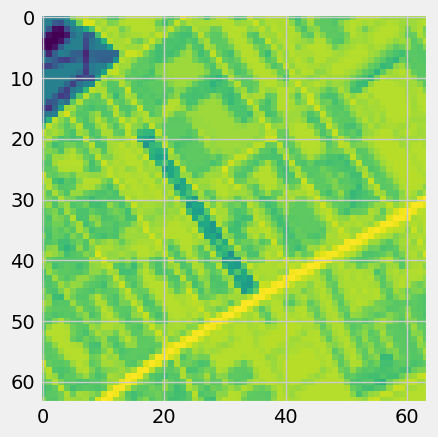

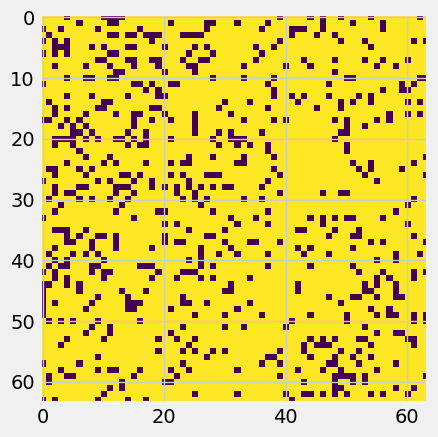

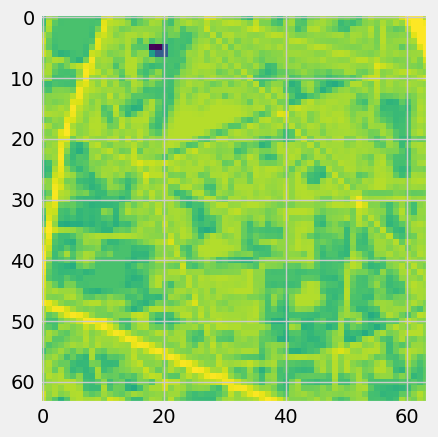

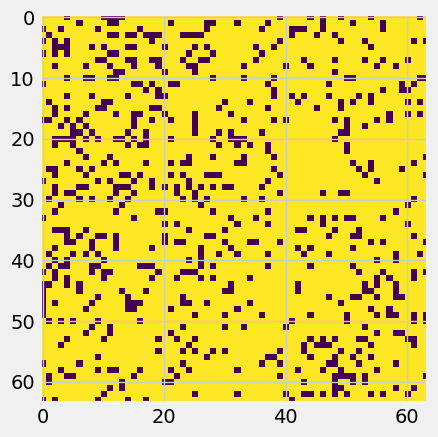

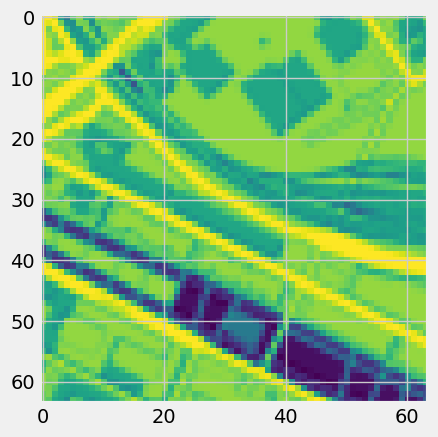

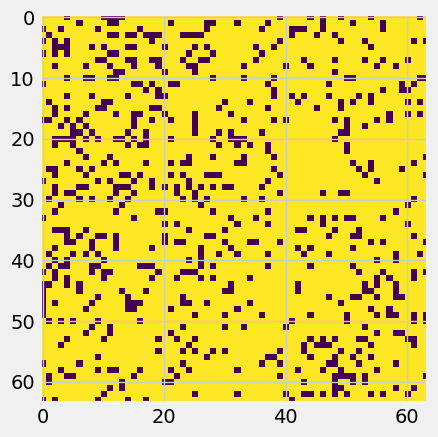

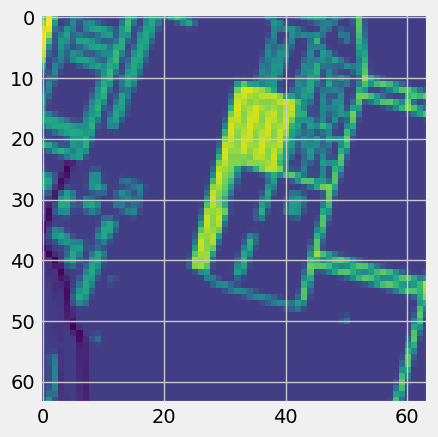

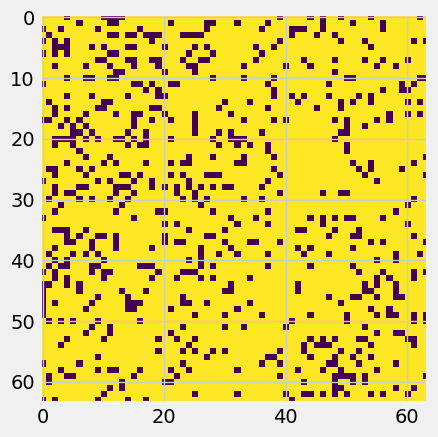

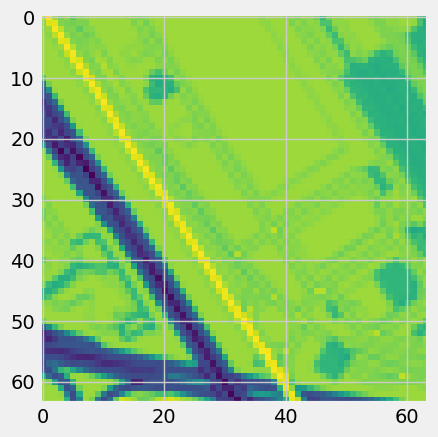

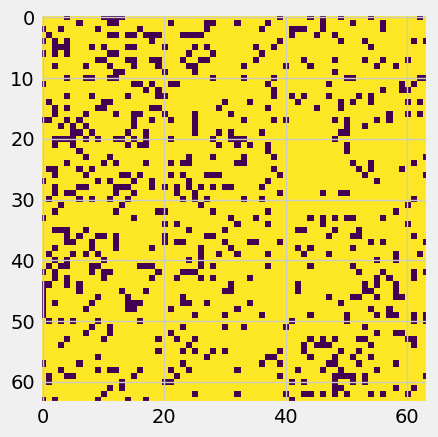

In [16]:
for i in range(10):
    plt.imshow(outputs[-i][2].reshape(dim, dim))
    plt.show()
    plt.imshow(outputs[-i][3].reshape(dim, dim).detach())
    plt.show()